In [ ]:
import pandas as pd
import nltk as nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer 
nltk.download('popular')

In [33]:
FicTexts = pd.read_csv('TextClassData.csv')
FicTexts.drop_duplicates()

,Unnamed: 0,ID,Text,POV
0,0,1873059,['You thought it would be easy to find him fol...,SP
1,1,15729375,"['\xa0', 'Raw, unbridled passion.\xa0', 'It fi...",SP
2,2,21143303,"['“I don’t get humans,” you say for the umptee...",SP
3,3,7254226,"['A young man stands in his father’s study, a ...",SP
4,4,11795490,"['You’ve heard the rumors, the whisperings beh...",SP
...,...,...,...,...
370,55,24032950,['Castiel stood in front of a blonde woman whi...,TP_Omni
371,56,2001234,"[""You: Two years, it had been two years. John ...",TP_Omni
372,57,2135307,"[""PARTNER: Everyone had one of those little ho...",TP_Omni
373,58,19173559,"['The night after the Apocalypse-That-Wasn’t, ...",TP_Omni


#### Cleaning up the leftover artifacts from html extraction

In [164]:
FicTexts.Text = [string.replace(u'\\xa0', u' ') for string in FicTexts.Text]
FicTexts.Text = [string.replace(u"\', \'", u' ') for string in FicTexts.Text]
FicTexts.Text = [string.replace(u"  ", u' ') for string in FicTexts.Text]
FicTexts.Text = [string.replace(u"\\n\\n", u'') for string in FicTexts.Text]
FicTexts.Text = [string.replace(u">>", u'') for string in FicTexts.Text]
FicTexts.Text = [string.replace(u", \'", u'') for string in FicTexts.Text]
FicTexts.Text = [string.replace(u"\',", u'') for string in FicTexts.Text]
FicTexts.Text = [string.replace(u"\\n", u'') for string in FicTexts.Text]
FicTexts.Text = [string.replace(u'", "', u' ') for string in FicTexts.Text]
FicTexts.Text = [string.replace(u'\\', u'') for string in FicTexts.Text]
FicTexts.Text = [string.replace(u'[', u'') for string in FicTexts.Text]
FicTexts.Text = [string.replace(u']', u'') for string in FicTexts.Text]
FicTexts.Text = [string.replace(u"'", u'') for string in FicTexts.Text]

In [165]:
FicTexts

,Unnamed: 0,ID,Text,POV
0,0,1873059,You thought it would be easy to find him follo...,SP
1,1,15729375,"Raw, unbridled passion. It finds your lips af...",SP
2,2,21143303,"“I don’t get humans,” you say for the umpteent...",SP
3,3,7254226,"A young man stands in his father’s study, a sh...",SP
4,4,11795490,"You’ve heard the rumors, the whisperings behin...",SP
...,...,...,...,...
370,55,24032950,Castiel stood in front of a blonde woman while...,TP_Omni
371,56,2001234,"""You: Two years, it had been two years. John W...",TP_Omni
372,57,2135307,"""PARTNER: Everyone had one of those little hob...",TP_Omni
373,58,19173559,"The night after the Apocalypse-That-Wasn’t, an...",TP_Omni


In [171]:
# It's easier to work with lowercase text data, but I'll also keep the original intact
ProcessText = FicTexts.copy()
ProcessText.Text = [text.lower() for text in FicTexts.Text]
ProcessText

,Unnamed: 0,ID,Text,POV
0,0,1873059,you thought it would be easy to find him follo...,SP
1,1,15729375,"raw, unbridled passion. it finds your lips af...",SP
2,2,21143303,"“i don’t get humans,” you say for the umpteent...",SP
3,3,7254226,"a young man stands in his father’s study, a sh...",SP
4,4,11795490,"you’ve heard the rumors, the whisperings behin...",SP
...,...,...,...,...
370,55,24032950,castiel stood in front of a blonde woman while...,TP_Omni
371,56,2001234,"""you: two years, it had been two years. john w...",TP_Omni
372,57,2135307,"""partner: everyone had one of those little hob...",TP_Omni
373,58,19173559,"the night after the apocalypse-that-wasn’t, an...",TP_Omni


#### Making a DataFrame where the text is Tokenized by sentences, to focus on how sentences start

In [173]:
SenText = ProcessText.copy()
SenText.Text = [nltk.sent_tokenize(i) for i in ProcessText.Text]
SenText

,Unnamed: 0,ID,Text,POV
0,0,1873059,[you thought it would be easy to find him foll...,SP
1,1,15729375,"[ raw, unbridled passion., it finds your lips ...",SP
2,2,21143303,"[“i don’t get humans,” you say for the umpteen...",SP
3,3,7254226,"[a young man stands in his father’s study, a s...",SP
4,4,11795490,"[you’ve heard the rumors, the whisperings behi...",SP
...,...,...,...,...
370,55,24032950,[castiel stood in front of a blonde woman whil...,TP_Omni
371,56,2001234,"[""you: two years, it had been two years., john...",TP_Omni
372,57,2135307,"[""partner: everyone had one of those little ho...",TP_Omni
373,58,19173559,"[the night after the apocalypse-that-wasn’t, a...",TP_Omni


In [176]:
print(SenText.Text[370][0])

castiel stood in front of a blonde woman while being held at gunpoint.


#### Creating a DataFrame of text tokenized by word so I can just gather information about raw word frequency for some key words

In [169]:
WorText = ProcessText.copy()
WorText.Text = [nltk.word_tokenize(i) for i in ProcessText.Text]
WorText

,Unnamed: 0,ID,Text,POV
0,0,1873059,"[you, thought, it, would, be, easy, to, find, ...",SP
1,1,15729375,"[raw, ,, unbridled, passion, ., it, finds, you...",SP
2,2,21143303,"[“, i, don, ’, t, get, humans, ,, ”, you, say,...",SP
3,3,7254226,"[a, young, man, stands, in, his, father, ’, s,...",SP
4,4,11795490,"[you, ’, ve, heard, the, rumors, ,, the, whisp...",SP
...,...,...,...,...
370,55,24032950,"[castiel, stood, in, front, of, a, blonde, wom...",TP_Omni
371,56,2001234,"[``, you, :, two, years, ,, it, had, been, two...",TP_Omni
372,57,2135307,"[``, partner, :, everyone, had, one, of, those...",TP_Omni
373,58,19173559,"[the, night, after, the, apocalypse-that-wasn,...",TP_Omni


In [225]:
WorText.Text[3][6]

'f'

In [ ]:
FP_wordlist = ['i', 'me', 'myself', 'we', 'our', 'ours', "i'm", 'my']
SP_wordlist = ['you', 'your', 'yours', 'yourself', 'yourselves']
TP_wordlist = ['he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'they', 'them', 'their', 'it', "it's", "it'self", "theirs", 'themselves']

WorText['I-me-my'] = np.nan
WorText['you-your'] = np.nan
WorText['she/her'] = np.nan
f = 0
for i in WorText.Text:
    g = []
    H = []
    j = []
    L = 0
    for k in WorText.Text[f]:
        if k in  FP_wordlist :
            g.append(k)
        if k in  SP_wordlist :
            H.append(k)
        if k in  TP_wordlist :
            j.append(k)
        L = L + 1
    try:
        WorText['I-me-my'][f] = (float(len(g)) / float(len(WorText.Text[f]))) * 100
    except:
        WorText['I-me-my'][f] = 0
    try:
        WorText['you-your'][f] = (float(len(H)) / float(len(WorText.Text[f]))) * 100
    except:
        WorText['you-your'][f] = 0
    try:
        WorText['she/her'][f] = (float(len(j)) / float(len(WorText.Text[f]))) * 100
    except:
        WorText['she/her'][f] = 0
    f = f + 1

In [233]:
WorText.loc[80:100]

,Unnamed: 0,ID,Text,POV,I-me-my,you-your,she/her
80,0,3523577,"[it, ’, s, said, that, one, in, every, hundred...",FP,0.625000,0.625000,4.375000
81,1,849526,"[``, i, couldnt, believe, the, state, the, roo...",FP,7.852761,2.024540,5.092025
82,2,16632230,"[hey, ,, morons, ., name, ’, s, negasonic, tee...",FP,2.914798,0.672646,4.260090
83,3,5064814,"[he, feels, like, an, open, wound, and, i, dig...",FP,12.340426,0.425532,4.255319
84,4,7823203,"[``, “, i, never, thanked, you., ”, i, stiffen...",FP,10.613208,1.415094,5.896226
85,5,1760115,"[i, have, really, ,, really, strange, friends,...",FP,6.684151,0.629449,4.563507
86,6,29530764,"[(, see, the, end, of, the, chapter, for, note...",FP,6.921241,1.163484,3.997613
87,7,6501439,"[``, ive, divided, my, life, into, three, unif...",FP,7.436399,2.544031,2.544031
88,8,20521550,"[xylon, growled, when, his, swirled, eyes, set...",FP,0.689655,1.379310,9.655172
89,9,15561360,"[here, we, are, again, ,, you, and, me, ,, it,...",FP,7.863031,2.282815,5.136335


In [ ]:
print(WorText.Text[3])

In [ ]:
FP_wordlist = ['i', 'me', 'myself', 'we', 'our', 'ours', "i'm", 'my']
SenText['I-me-my'] = np.nan
f = 0
for i in SenText.Text:
    g = []
    L = 0
    for k in SenText.Text[f]:
        v = SenText.Text[f][L][0]
        if v in  FP_wordlist and SenText.Text[f][L][1] == ' ':
            g.append(v)
        L = L + 1
    try:
        SenText['I-me-my'][f] = (float(len(g)) / float(len(SenText.Text[f]))) * 100
    except:
        SenText['I-me-my'][f] = 0
    f = f + 1

SenText

In [ ]:
SP_wordlist = ['you', 'your', 'yours', 'yourself', 'yourselves']
SenText['you/your'] = np.nan
f = 0
for i in SenText.Text:
    g = []
    L = 0
    for k in SenText.Text[f]:
        v = SenText.Text[f][L][0]
        if v in SP_wordlist and SenText.Text[f][L][1] == ' ':
            g.append(v)
        L = L + 1
    try:
        SenText['you/your'][f] = (float(len(g)) / float(len(SenText.Text[f]))) * 100
    except:
        SenText['you/your'][f] = 0
    f = f + 1

In [ ]:
TP_wordlist = ['he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'they', 'them', 'their', 'it', "it's", "it'self", "theirs", 'themselves']
SenText['he/him'] = np.nan
f = 0
for i in SenText.Text:
    g = []
    L = 0
    for k in SenText.Text[f]:
        v = SenText.Text[f][L][0]
        if v in TP_wordlist and SenText.Text[f][L][1] == ' ':
            g.append(v)
        L = L + 1
    try:
        SenText['he/him'][f] = (float(len(g)) / float(len(SenText.Text[f]))) * 100
    except:
        SenText['he/him'][f] = 0
    f = f + 1

In [220]:
SenText

,Unnamed: 0,ID,Text,POV,I-me-my,you/your,he/him
0,0,1873059,[you thought it would be easy to find him foll...,SP,9.090909,0.0,0.0
1,1,15729375,"[ raw, unbridled passion., it finds your lips ...",SP,0.000000,0.0,0.0
2,2,21143303,"[“i don’t get humans,” you say for the umpteen...",SP,3.846154,0.0,0.0
3,3,7254226,"[a young man stands in his father’s study, a s...",SP,2.645503,0.0,0.0
4,4,11795490,"[you’ve heard the rumors, the whisperings behi...",SP,0.995025,0.0,0.0
...,...,...,...,...,...,...,...
370,55,24032950,[castiel stood in front of a blonde woman whil...,TP_Omni,1.652893,0.0,0.0
371,56,2001234,"[""you: two years, it had been two years., john...",TP_Omni,1.837838,0.0,0.0
372,57,2135307,"[""partner: everyone had one of those little ho...",TP_Omni,0.539811,0.0,0.0
373,58,19173559,"[the night after the apocalypse-that-wasn’t, a...",TP_Omni,12.000000,0.0,0.0


In [205]:
SenText.Text[89][7]

'i did protest, mind, but she wasn’t hearing any of it.'

#### You/your and he/him are all registering as zero because I forgot the code was only checking the first letter.

In [217]:
SenText.loc[80:100]

,Unnamed: 0,ID,Text,POV,I-me-my,you/your,he/him
80,0,3523577,[it’s said that one in every hundred people on...,FP,0.000000,0.0,0.0
81,1,849526,"[""i couldnt believe the state the room was in....",FP,24.509804,0.0,0.0
82,2,16632230,"[hey, morons., name’s negasonic teenage warhea...",FP,11.538462,0.0,0.0
83,3,5064814,[he feels like an open wound and i dig my fing...,FP,30.769231,0.0,0.0
84,4,7823203,"[""“i never thanked you.” i stiffen at the soun...",FP,12.000000,0.0,0.0
85,5,1760115,"[i have really, really strange friends., i’m j...",FP,18.577649,0.0,0.0
86,6,29530764,"[ (see the end of the chapter for notes.), it’...",FP,7.878788,0.0,0.0
87,7,6501439,"[""ive divided my life into three uniform spher...",FP,0.000000,0.0,0.0
88,8,20521550,[xylon growled when his swirled eyes settled o...,FP,0.000000,0.0,0.0
89,9,15561360,"[here we are again, you and me, it’s been a wh...",FP,26.865672,0.0,0.0


In [129]:
ProcessText.Text

0      you thought it would be easy to find him follo...
1       raw, unbridled passion. it finds your lips af...
2      “i don’t get humans,” you say for the umpteent...
3      a young man stands in his father’s study, a sh...
4      you’ve heard the rumors, the whisperings behin...
                             ...                        
370    castiel stood in front of a blonde woman while...
371    "you: two years, it had been two years. john w...
372    "partner: everyone had one of those little hob...
373    the night after the apocalypse-that-wasn’t, an...
374    cas looked around the halloween party, tugging...
Name: Text, Length: 375, dtype: object

In [127]:
ProcessText

,Unnamed: 0,ID,Text,POV
0,0,1873059,you thought it would be easy to find him follo...,SP
1,1,15729375,"raw, unbridled passion. it finds your lips af...",SP
2,2,21143303,"“i don’t get humans,” you say for the umpteent...",SP
3,3,7254226,"a young man stands in his father’s study, a sh...",SP
4,4,11795490,"you’ve heard the rumors, the whisperings behin...",SP
...,...,...,...,...
370,55,24032950,castiel stood in front of a blonde woman while...,TP_Omni
371,56,2001234,"""you: two years, it had been two years. john w...",TP_Omni
372,57,2135307,"""partner: everyone had one of those little hob...",TP_Omni
373,58,19173559,"the night after the apocalypse-that-wasn’t, an...",TP_Omni


In [288]:
GL1 = []
GL1.append(WorText.loc[WorText['POV'] == 'FP']['I-me-my'].median())
GL1.append(WorText.loc[WorText['POV'] == 'TP']['I-me-my'].median())
GL1.append(WorText.loc[WorText['POV'] == 'SP']['I-me-my'].median())
GL1.append(WorText.loc[WorText['POV'] == 'TP_Omni']['I-me-my'].median())
GL1.append(WorText.loc[WorText['POV'] == 'TP_Lim']['I-me-my'].median())
GL1

[7.080165289256199,
 1.1416079669662376,
 0.8290578302557666,
 1.1420412881945934,
 1.0018635431408565]

In [278]:
GF1 = pd.DataFrame(GL1, index=['FP','TP', 'SP', 'TP_Omni', 'TP_Lim' ])
GF1.T

,FP,TP,SP,TP_Omni,TP_Lim
0,7.080165,1.141608,0.829058,1.142041,1.001864


In [290]:
GL2 = []
GL2.append(WorText.loc[WorText['POV'] == 'FP']['you-your'].median())
GL2.append(WorText.loc[WorText['POV'] == 'TP']['you-your'].median())
GL2.append(WorText.loc[WorText['POV'] == 'SP']['you-your'].median())
GL2.append(WorText.loc[WorText['POV'] == 'TP_Omni']['you-your'].median())
GL2.append(WorText.loc[WorText['POV'] == 'TP_Lim']['you-your'].median())
GL2

[0.8142537666442391,
 0.9529860228716646,
 7.055236256601443,
 0.8709447032278046,
 0.7194448139286183]

In [292]:
GF2 = pd.DataFrame(GL2, index=['FP','TP', 'SP', 'TP_Omni', 'TP_Lim' ])
GF2.T

,FP,TP,SP,TP_Omni,TP_Lim
0,0.814254,0.952986,7.055236,0.870945,0.719445


In [295]:
GL3 = []
GL3.append(WorText.loc[WorText['POV'] == 'FP']['she/her'].median())
GL3.append(WorText.loc[WorText['POV'] == 'TP']['she/her'].median())
GL3.append(WorText.loc[WorText['POV'] == 'SP']['she/her'].median())
GL3.append(WorText.loc[WorText['POV'] == 'TP_Omni']['she/her'].median())
GL3.append(WorText.loc[WorText['POV'] == 'TP_Lim']['she/her'].median())
GL3

[4.552117417190634,
 7.711757269279393,
 4.617950784339449,
 7.203878401733466,
 6.915436785716098]

In [296]:
GF3 = pd.DataFrame(GL3, index=['FP','TP', 'SP', 'TP_Omni', 'TP_Lim' ])
GF3.T

,FP,TP,SP,TP_Omni,TP_Lim
0,4.552117,7.711757,4.617951,7.203878,6.915437


<AxesSubplot:>

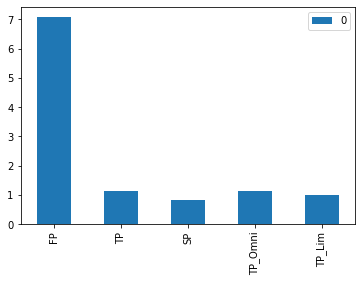

In [287]:
GF1.plot.bar() # Median Percentage of Fic with First Person Key-words

<AxesSubplot:>

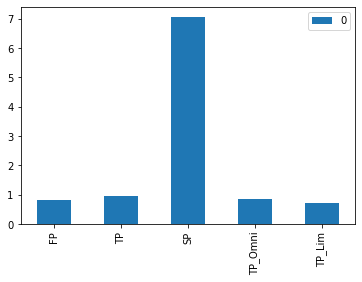

In [293]:
GF2.plot.bar() # Median Percentage of Fic with Second-Person Key-words

<AxesSubplot:>

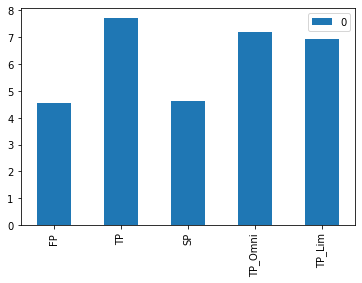

In [297]:
GF3.plot.bar() # Median Percentage of fic with third person key words

## Preliminary Analysis shows that First Person and Second Peroson key words are very strong indicators. Meanwhile third person indicators carry some information, but are much weaker. 

In [298]:
GL4 = []
GL4.append(SenText.loc[SenText['POV'] == 'FP']['I-me-my'].median())
GL4.append(SenText.loc[SenText['POV'] == 'TP']['I-me-my'].median())
GL4.append(SenText.loc[SenText['POV'] == 'SP']['I-me-my'].median())
GL4.append(SenText.loc[SenText['POV'] == 'TP_Omni']['I-me-my'].median())
GL4.append(SenText.loc[SenText['POV'] == 'TP_Lim']['I-me-my'].median())
GL4

[17.65283743032075,
 1.0869565217391304,
 0.2320223260643821,
 1.7003853564547207,
 0.4849150255037855]

In [299]:
GF4 = pd.DataFrame(GL4, index=['FP','TP', 'SP', 'TP_Omni', 'TP_Lim' ])
GF4.T

,FP,TP,SP,TP_Omni,TP_Lim
0,17.652837,1.086957,0.232022,1.700385,0.484915


<AxesSubplot:>

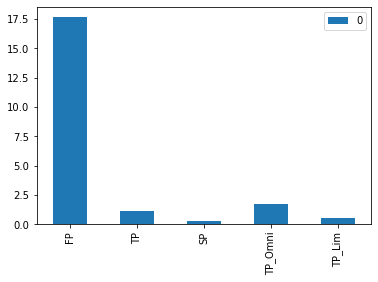

In [300]:
GF4.plot.bar() # Percentage of sentences beginning with the letter 'i'

## This was an accidental misapproximation of Sentences beginning with the *Word* 'i'. Regardless, it appears to be an extremely powerful indicator, and it would be useful to figure out how I might do a proper begining of sentence feature extraction for every category. 

In [304]:
FicTexts.to_csv('Clean_Original_TextData.csv')
ProcessText.to_csv('Processed_TextData.csv')
SenText.to_csv('sentenceToken_TextData.csv')
WorText.to_csv('WordToken_TextData.csv')